# Modeling and Simulation in Python

Chapter 21

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### With air resistance

Next we'll add air resistance using the [drag equation](https://en.wikipedia.org/wiki/Drag_equation)

I'll start by getting the units we'll need from Pint.

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

<Unit('kilogram')>

Now I'll create a `Params` object to contain the quantities we need.  Using a Params object is convenient for grouping the system parameters in a way that's easy to read (and double-check).

In [3]:
params = Params(height = 381 * m,
                v_init = 0 * m / s,
                g = 9.8 * m/s**2,
                mass = 2.5e-3 * kg,
                diameter = 19e-3 * m,
                rho = 1.2 * kg/m**3,
                v_term = 18 * m / s)

,values
height,381 meter
v_init,0.0 meter / second
g,9.8 meter / second ** 2
mass,0.0025 kilogram
diameter,0.019 meter
rho,1.2 kilogram / meter ** 3
v_term,18.0 meter / second


Now we can pass the `Params` object `make_system` which computes some additional parameters and defines `init`.

`make_system` uses the given radius to compute `area` and the given `v_term` to compute the drag coefficient `C_d`.

In [4]:
def make_system(params):
    """Makes a System object for the given conditions.
    
    params: Params object
    
    returns: System object
    """
    unpack(params)
    
    area = np.pi * (diameter/2)**2
    C_d = 2 * mass * g / (rho * area * v_term**2)
    init = State(y=height, v=v_init)
    t_end = 30 * s
    
    return System(params, area=area, C_d=C_d, 
                  init=init, t_end=t_end)

Let's make a `System`

In [5]:
system = make_system(params)

,values
height,381 meter
v_init,0.0 meter / second
g,9.8 meter / second ** 2
mass,0.0025 kilogram
diameter,0.019 meter
rho,1.2 kilogram / meter ** 3
v_term,18.0 meter / second
area,0.0002835287369864788 meter ** 2
C_d,0.4445009981135434 dimensionless
init,y 381 meter v 0.0 meter / secon...


Here's the slope function, including acceleration due to gravity and drag.

In [6]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of y and v
    """
    y, v = state
    unpack(system)
    
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    dydt = v
    dvdt = -g + a_drag
    
    return dydt, dvdt

As always, let's test the slope function with the initial conditions.

In [7]:
slope_func(system.init, 0, system)

(<Quantity(0.0, 'meter / second')>, <Quantity(-9.8, 'meter / second ** 2')>)

We can use the same event function as in the previous chapter.

In [8]:
def event_func(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    y, v = state
    return y

And then run the simulation.

In [9]:
results, details = run_ode_solver(system, slope_func, events=event_func, max_step=0.5*s)
details.message

'A termination event occurred.'

Here are the results.

In [10]:
results

,y,v
0.000000,3.810000e+02,0.000000
0.000102,3.810000e+02,-0.001000
0.001122,3.810000e+02,-0.011000
0.011327,3.809994e+02,-0.110998
0.113367,3.809371e+02,-1.109588
0.613367,3.791898e+02,-5.797088
1.113367,3.752652e+02,-9.745614
1.613367,3.696115e+02,-12.701005
2.113367,3.627205e+02,-14.723219
2.613367,3.550087e+02,-16.023394


The final height is close to 0, as expected.

Interestingly, the final velocity is not exactly terminal velocity, which suggests that there are some numerical errors.

We can get the flight time from `results`.

In [11]:
t_sidewalk = get_last_label(results)

22.4397909658943

Here's the plot of position as a function of time.

Saving figure to file figs/chap09-fig02.pdf


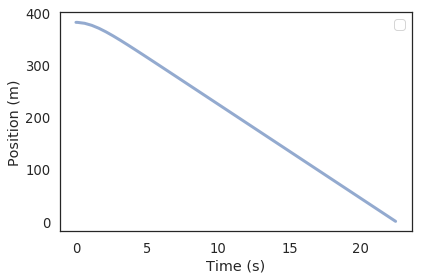

In [12]:
def plot_position(results):
    plot(results.y)
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
plot_position(results)
savefig('figs/chap09-fig02.pdf')

And velocity as a function of time:

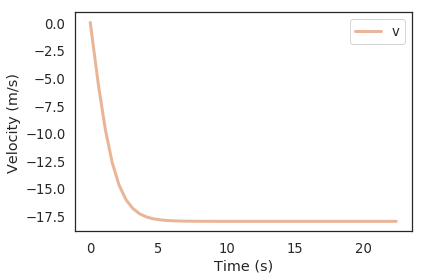

In [13]:
def plot_velocity(results):
    plot(results.v, color='C1', label='v')
        
    decorate(xlabel='Time (s)',
             ylabel='Velocity (m/s)')
    
plot_velocity(results)

From an initial velocity of 0, the penny accelerates downward until it reaches terminal velocity; after that, velocity is constant.

**Exercise:** Run the simulation with an initial velocity, downward, that exceeds the penny's terminal velocity.  Hint: You can create a new `Params` object based on an existing one, like this:

`params = Params(params, v_init = -30 * m / s)`

What do you expect to happen?  Plot velocity and position as a function of time, and see if they are consistent with your prediction.

In [14]:
# Solution goes here

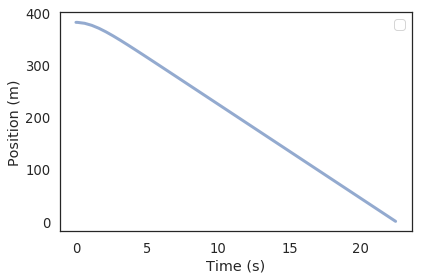

In [15]:
plot_position(results)

In [16]:
# Solution goes here

**Exercise:** Suppose we drop a quarter from the Empire State Building and find that its flight time is 19.1 seconds.  Use this measurement to estimate the terminal velocity.

1. You can get the relevant dimensions of a quarter from https://en.wikipedia.org/wiki/Quarter_(United_States_coin).

2. Create a `Params` object with the system parameters.  We don't know `v_term`, so we'll start with the inital guess `v_term = 18 * m / s`.

3. Use `make_system` to create a `System` object.

4. Call `run_ode_solver` to simulate the system.  How does the flight time of the simulation compare to the measurement?

5. Try a few different values of `t_term` and see if you can get the simulated flight time close to 19.1 seconds.

6. Optionally, write an error function and use `fsolve` to improve your estimate.

7. Use your best estimate of `v_term` to compute `C_d`.

Note: I fabricated the observed flight time, so don't take the results of this exercise too seriously.

In [17]:
# Solution goes here

In [18]:
# Solution goes here

In [19]:
# Solution goes here

In [20]:
# Solution goes here

In [21]:
# Solution goes here

In [22]:
# Solution goes here

In [23]:
# Solution goes here

In [24]:
# Solution goes here

### Bungee jumping

Suppose you want to set the world record for the highest "bungee dunk", [as shown in this video](https://www.youtube.com/watch?v=UBf7WC19lpw).  Since the record is 70 m, let's design a jump for 80 m.

We'll make the following modeling assumptions:

1. Initially the bungee cord hangs from a crane with the attachment point 80 m above a cup of tea.

2. Until the cord is fully extended, it applies no force to the jumper.  It turns out this might not be a good assumption; we will revisit it.

3. After the cord is fully extended, it obeys [Hooke's Law](https://en.wikipedia.org/wiki/Hooke%27s_law); that is, it applies a force to the jumper proportional to the extension of the cord beyond its resting length.

4. The jumper is subject to drag force proportional to the square of their velocity, in the opposite of their direction of motion.

Our objective is to choose the length of the cord, `L`, and its spring constant, `k`, so that the jumper falls all the way to the tea cup, but no farther! 

First I'll create a `Param` object to contain the quantities we'll need:

1. Let's assume that the jumper's mass is 75 kg.

2. With a terminal velocity of 60 m/s.

3. The length of the bungee cord is `L = 40 m`.

4. The spring constant of the cord is `k = 20 N / m` when the cord is stretched, and 0 when it's compressed.


In [25]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

In [26]:
params = Params(y_attach = 80 * m,
                v_init = 0 * m / s,
                g = 9.8 * m/s**2,
                mass = 75 * kg,
                area = 1 * m**2,
                rho = 1.2 * kg/m**3,
                v_term = 60 * m / s,
                L = 25 * m,
                k = 40 * N / m)

Now here's a version of `make_system` that takes a `Params` object as a parameter.

`make_system` uses the given value of `v_term` to compute the drag coefficient `C_d`.

In [27]:
def make_system(params):
    """Makes a System object for the given params.
    
    params: Params object
    
    returns: System object
    """
    unpack(params)
    
    C_d = 2 * mass * g / (rho * area * v_term**2)
    init = State(y=y_attach, v=v_init)
    t_end = 20 * s

    return System(params, C_d=C_d, 
                  init=init, t_end=t_end)

Let's make a `System`

In [28]:
system = make_system(params)

`spring_force` computes the force of the cord on the jumper:

In [29]:
def spring_force(y, system):
    """Computes the force of the bungee cord on the jumper:
    
    y: height of the jumper
    
    Uses these variables from system|
    y_attach: height of the attachment point
    L: resting length of the cord
    k: spring constant of the cord
    
    returns: force in N
    """
    unpack(system)
    distance_fallen = y_attach - y
    if distance_fallen <= L:
        return 0 * N
    
    extension = distance_fallen - L
    f_spring = k * extension
    return f_spring

The spring force is 0 until the cord is fully extended.  When it is extended 1 m, the spring force is 40 N. 

In [30]:
spring_force(80*m, system)

In [31]:
spring_force(55*m, system)

In [32]:
spring_force(54*m, system)

`drag_force` computes drag as a function of velocity:

In [33]:
def drag_force(v, system):
    """Computes drag force in the opposite direction of `v`.
    
    v: velocity
    system: System object

    returns: drag force
    """
    unpack(system)
    f_drag = -np.sign(v) * rho * v**2 * C_d * area / 2
    return f_drag

Here's the drag force at 60 meters per second.

In [34]:
v = -60 * m/s
f_drag = drag_force(v, system)

Acceleration due to drag at 60 m/s is approximately g, which confirms that 60 m/s is terminal velocity.

In [35]:
a_drag = f_drag / system.mass

Now here's the slope function:

In [36]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    y, v = state
    unpack(system)
    
    a_drag = drag_force(v, system) / mass
    a_spring = spring_force(y, system) / mass
    dvdt = -g + a_drag + a_spring
    
    return v, dvdt

As always, let's test the slope function with the initial params.

In [37]:
slope_func(system.init, 0, system)

And then run the simulation.

In [38]:
results, details = run_ode_solver(system, slope_func, max_step=0.3*s)
details

Here's the plot of position as a function of time.

In [39]:
plot_position(results)

After reaching the lowest point, the jumper springs back almost to almost 70 m, and oscillates several times.  That looks like more osciallation that we expect from an actual jump, which suggests that there some dissipation of energy in the real world that is not captured in our model.  To improve the model, that might be a good thing to investigate.

But since we are primarily interested in the initial descent, the model might be good enough for now.

We can use `min` to find the lowest point:

In [40]:
min(results.y)

At the lowest point, the jumper is still too high, so we'll need to increase `L` or decrease `k`.

Here's velocity as a function of time:

In [41]:
plot_velocity(results)

In [42]:
subplot(1, 2, 1)
plot_position(results)

subplot(1, 2, 2)
plot_velocity(results)

savefig('figs/chap09-fig03.pdf')

Although we compute acceleration inside the slope function, we don't get acceleration as a result from `run_ode_solver`.

We can approximate it by computing the numerical derivative of `ys`:

In [43]:
a = gradient(results.v)
plot(a)
decorate(xlabel='Time (s)',
         ylabel='Acceleration (m/$s^2$)')

And we can compute the maximum acceleration the jumper experiences:

In [44]:
max_acceleration = max(a) * m/s**2

Relative to the acceleration of gravity, the jumper "pulls" about "1.7 g's".

In [45]:
max_acceleration / g

### Under the hood

The gradient function in `modsim.py` adapts the NumPy function of the same name so it works with `Series` objects.


In [46]:
%psource gradient

### Solving for length

Assuming that `k` is fixed, let's find the length `L` that makes the minimum altitude of the jumper exactly 0.

The metric we are interested in is the lowest point of the first oscillation.  For both efficiency and accuracy, it is better to stop the simulation when we reach this point, rather than run past it and the compute the minimum.

Here's an event function that stops the simulation when velocity is 0.

In [47]:
def event_func(state, t, system):
    """Return velocity.
    """
    y, v = state
    return v

As usual, we should test it with the initial conditions.

In [48]:
event_func(system.init, 0, system)

And we see that we have a problem.  Since the event function returns 0 under the initial conditions, the simulation would stop immediately.  We can solve that problem by specifying the direction of the event function:

In [49]:
event_func.direction = +1

When direction is positive, it only stops the simulation if the velocity is 0 and increasing, which is what we want.

Now we can test it an confirm that it stops at the bottom of the jump.

In [50]:
results, details = run_ode_solver(system, slope_func, events=event_func, max_step=0.3*s)
plot_position(results)

In [51]:
min(results.y)

**Exercise:** Write an error function that takes `L` and `params` as arguments, simulates a bungee jump, and returns the lowest point.

Test the error function with a guess of 25 m and confirm that the return value is about 5 meters.

Use `fsolve` with your error function to find the value of `L` that yields a perfect bungee dunk.

Run a simulation with the result from `fsolve` and confirm that it works.


In [52]:
# Solution goes here

In [53]:
# Solution goes here

In [54]:
# Solution goes here

In [55]:
# Solution goes here

**Optional exercise:** Search for the combination of length and spring constant that yields minimum height 0 while minimizing peak acceleration.

In [56]:
# Solution goes here

In [57]:
# Solution goes here